In [1]:
import json
from pathlib import Path

# Path to your original slice file
file_path = Path(r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\final_proj\data\mpd.slice.1000-1999.json")

# Load the full slice
with open(file_path, 'r', encoding='utf-8') as f:
    mpd_slice = json.load(f)

# Check how many playlists are inside
print(f"Total playlists in this slice: {len(mpd_slice['playlists'])}")

# Pick one playlist (for example the first one)
playlist = mpd_slice["playlists"][10]   # or e.g. [42] for the 43rd playlist

# Path to the new file where you want to save it
save_path = Path(r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\final_proj\data\single_playlist.json")

artists = []

for i, track in enumerate(playlist["tracks"]):
    artist_name = track['artist_name']
    if artist_name not in artists:
        artists.append(artist_name)
print(f"\nTotal unique artists in the playlist: {len(artists)}")
print("Artists:")
for artist in artists:
    print(f" - {artist}")

Total playlists in this slice: 1000

Total unique artists in the playlist: 63
Artists:
 - Christina Aguilera
 - Natasha Bedingfield
 - A Tribe Called Quest
 - TLC
 - The Killers
 - MGMT
 - Kygo
 - Marvin Gaye
 - Stevie Wonder
 - Van Morrison
 - Redbone
 - The Jackson 5
 - The Black Eyed Peas
 - Mark Ronson
 - DJ Kool
 - Tag Team
 - Frankie Valli & The Four Seasons
 - Jamiroquai
 - O.A.R.
 - Afroman
 - Blues Image
 - Chance The Rapper
 - Antiserum
 - Beyoncé
 - a-ha
 - Earth, Wind & Fire
 - Backstreet Boys
 - House Of Pain
 - Sérgio Mendes
 - Shaggy
 - Missy Elliott
 - Snoop Dogg
 - Warren G
 - KC & The Sunshine Band
 - Disclosure
 - Estelle
 - Duran Duran
 - Gwen Stefani
 - Justin Timberlake
 - Shakira
 - Don Omar
 - Daryl Hall & John Oates
 - Brother Ali
 - Journey
 - Vanilla Ice
 - Blackstreet
 - JAY Z
 - Cam’ron
 - *NSYNC
 - Blue Swede
 - OMI
 - The Chainsmokers
 - Macklemore
 - LFO
 - The Verve
 - Third Eye Blind
 - Young Gunz
 - Whigfield
 - Elton John
 - Nappy Roots
 - Dexys Midn

In [ ]:
# print all tracks in the playlist
first_10_tracks = []
print("\nTracks in the playlist:")
for i, track in enumerate(playlist["tracks"]):
    if i < 10:
        print(f"   {i+1:3d} {track['track_name']} - {track['album_name']} - {track['artist_name']}")
        first_10_tracks.append(track['track_name'])
    else:
        break




Tracks in the playlist:
     1 Ain't No Other Man - Keeps Gettin' Better: A Decade Of Hits - Christina Aguilera
     2 Unwritten - Unwritten - Natasha Bedingfield
     3 Scenario - LP Mix - The Low End Theory - A Tribe Called Quest
     4 Waterfalls - Crazysexycool - TLC
     5 Mr. Brightside - Hot Fuss - The Killers
     6 Pocketful of Sunshine - Strip Me Away - Natasha Bedingfield
     7 Time to Pretend - Oracular Spectacular/Congratulations - MGMT
     8 Stole the Show - Cloud Nine - Kygo
     9 Sexual Healing - Kygo Remix - Sexual Healing - Marvin Gaye
    10 For Once In My Life - For Once In My Life - Stevie Wonder


In [27]:
import lyricsgenius
import os
import re
from pathlib import Path

# --- 1. SETUP GENIUS API ---
GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"  # <--- paste your token

# Initialize Genius client
genius = lyricsgenius.Genius(
    GENIUS_ACCESS_TOKEN,
    remove_section_headers=True,   # cleans up [Verse], etc.
    timeout=15,
    retries=3
)

# --- 2. SETUP FOLDERS AND TRACKS ---
# Use your playlist’s first 10 tracks (assuming variable 'playlist' already exists)
tracks_to_download = [
    {"title": t["track_name"], "artist": t["artist_name"]}
    for t in playlist["tracks"][:10]
]

# Folder to save lyrics
save_folder = Path(
    r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\final_proj\lyrics"
)
save_folder.mkdir(parents=True, exist_ok=True)

# --- 3. LOOP THROUGH SONGS AND SAVE LYRICS ---
for song_info in tracks_to_download:
    title = song_info["title"]
    artist = song_info["artist"]

    print(f"\nSearching for '{title}' by {artist}...")

    try:
        song = genius.search_song(title, artist)
        if song and song.lyrics:
            # Clean up lyrics
            lyrics = re.sub(r'\d*Embed$', '', song.lyrics).strip()

            # Make a safe filename: replace forbidden chars and spaces with "_"
            safe_title = re.sub(r'[\\/*?:"<>|]', "_", title)
            safe_title = safe_title.replace(" ", "_")
            filename = save_folder / f"{safe_title}.txt"

            # Save lyrics
            with open(filename, "w", encoding="utf-8") as f:
                # if it already exists, we overwrite
                
                f.write(lyrics)

            print(f"  ✅ Saved lyrics to: {filename.name}")

        else:
            print(f"  ⚠️  No lyrics found for '{title}'.")

    except Exception as e:
        print(f"  ❌ Error fetching '{title}': {e}")

    # Optional: pause to avoid rate limits
    time.sleep(1)

print("\n--- Done saving lyrics ---")


Searching for 'Ain't No Other Man' by Christina Aguilera...
Searching for "Ain't No Other Man" by Christina Aguilera...
Done.
  ✅ Saved lyrics to: Ain't_No_Other_Man.txt

Searching for 'Unwritten' by Natasha Bedingfield...
Searching for "Unwritten" by Natasha Bedingfield...
Done.
  ✅ Saved lyrics to: Unwritten.txt

Searching for 'Scenario - LP Mix' by A Tribe Called Quest...
Searching for "Scenario - LP Mix" by A Tribe Called Quest...
No results found for: 'Scenario - LP Mix A Tribe Called Quest'
  ⚠️  No lyrics found for 'Scenario - LP Mix'.

Searching for 'Waterfalls' by TLC...
Searching for "Waterfalls" by TLC...
Done.
  ✅ Saved lyrics to: Waterfalls.txt

Searching for 'Mr. Brightside' by The Killers...
Searching for "Mr. Brightside" by The Killers...
Done.
  ✅ Saved lyrics to: Mr._Brightside.txt

Searching for 'Pocketful of Sunshine' by Natasha Bedingfield...
Searching for "Pocketful of Sunshine" by Natasha Bedingfield...
Done.
  ✅ Saved lyrics to: Pocketful_of_Sunshine.txt

Searc

Do network with 1000 playlister
one network with edges between have same song 
one -||- artist 
dont include playlist having less then 40 songs and more then 100 



## Simple network song based

In [1]:
import json
import networkx as nx
from pathlib import Path
from tqdm import tqdm
import pickle

# --- 1. SETUP ---
data_dir = Path(
    r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\final_proj\data"
)

# Define which files to use (first 5 slices)
slice_files = [f"mpd.slice.{i*1000}-{i*1000+999}.json" for i in range(5)]

print(f"Processing {len(slice_files)} files:")
for f in slice_files:
    print("  -", f)

# --- 2. CREATE GRAPH ---
G = nx.Graph()

# --- 3. LOAD AND ADD NODES ---
for filename in slice_files:
    file_path = data_dir / filename
    with open(file_path, "r", encoding="utf-8") as f:
        mpd_slice = json.load(f)

    for pl in mpd_slice["playlists"]:
        pid = pl["pid"]
        track_uris = [t["track_uri"] for t in pl["tracks"]]
        artist_names = [t["artist_name"] for t in pl["tracks"]]

        G.add_node(
            pid,
            num_tracks=len(track_uris),
            track_uris=track_uris,
            artist_names=artist_names,
            name=pl.get("name", ""),
        )

print(f"Total playlists added: {G.number_of_nodes()}")

# --- 4. FILTER PLAYLISTS BASED ON NUMBER OF TRACKS ---
valid_nodes = [n for n, d in G.nodes(data=True) if 40 <= d["num_tracks"] <= 100]
G = G.subgraph(valid_nodes).copy()
print(f"Playlists remaining after filtering (40–100 tracks): {G.number_of_nodes()}")

# --- 5. CREATE EDGES BASED ON SHARED SONGS ---
song_to_playlists = {}
for node, data in tqdm(G.nodes(data=True), desc="Building song index"):
    for uri in data["track_uris"]:
        song_to_playlists.setdefault(uri, []).append(node)

edge_count = 0
for uri, plist in tqdm(song_to_playlists.items(), desc="Creating edges"):
    if len(plist) > 1:
        for i in range(len(plist)):
            for j in range(i + 1, len(plist)):
                p1, p2 = plist[i], plist[j]
                if p1 == p2:
                    continue  # prevent self-loops
                if G.has_edge(p1, p2):
                    G[p1][p2]["weight"] += 1
                else:
                    G.add_edge(p1, p2, weight=1)
                edge_count += 1

# --- 6. CLEANUP ---
G.remove_edges_from(nx.selfloop_edges(G))
print(f"Created {edge_count} edges (shared songs).")
print(f"Final graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")

# --- 7. SAVE GRAPH ---
with open("playlist_graph_shared_songs_first5.gpickle", "wb") as f:
    pickle.dump(G, f)

print("✅ Graph saved as 'playlist_graph_shared_songs_first5.gpickle'")


Processing 5 files:
  - mpd.slice.0-999.json
  - mpd.slice.1000-1999.json
  - mpd.slice.2000-2999.json
  - mpd.slice.3000-3999.json
  - mpd.slice.4000-4999.json
Total playlists added: 5000
Playlists remaining after filtering (40–100 tracks): 1871


Creating edges: 100%|██████████| 52677/52677 [00:01<00:00, 51076.16it/s]


Created 528819 edges (shared songs).
Final graph: 1871 nodes, 242151 edges.
✅ Graph saved as 'playlist_graph_shared_songs_first5.gpickle'


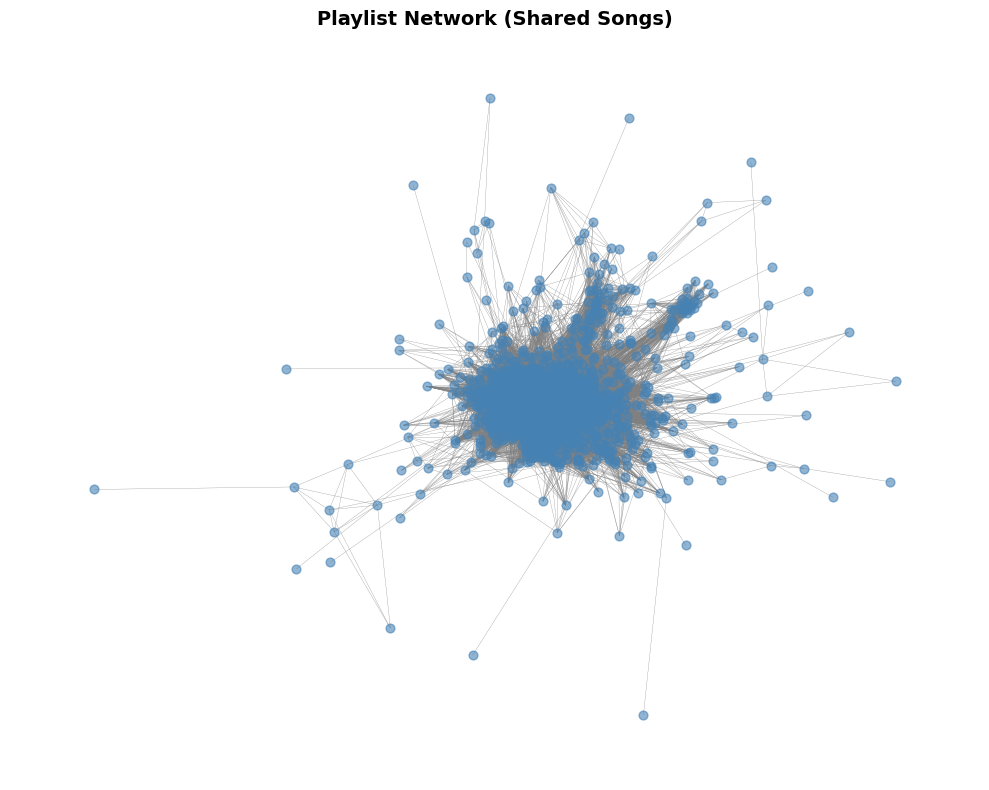

In [4]:
# Optional: only plot the largest connected component (avoids isolated nodes)
import matplotlib.pyplot as plt
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Using largest connected component ({G.number_of_nodes()} nodes).")

# --- 2. COMPUTE LAYOUT ---
pos = nx.spring_layout(G, k=0.25, iterations=50, seed=42)

# --- 3. PLOT ---
plt.figure(figsize=(10, 8))

nx.draw_networkx_edges(G, pos, width=0.2, alpha=1, edge_color="gray")
nx.draw_networkx_nodes(G, pos, node_size=40, node_color="steelblue", alpha=0.6)

plt.title("Playlist Network (Shared Songs)", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

Graph loaded: 1871 nodes, 242151 edges
Using largest connected component (1855 nodes).
Edge weights range from 1 to 42


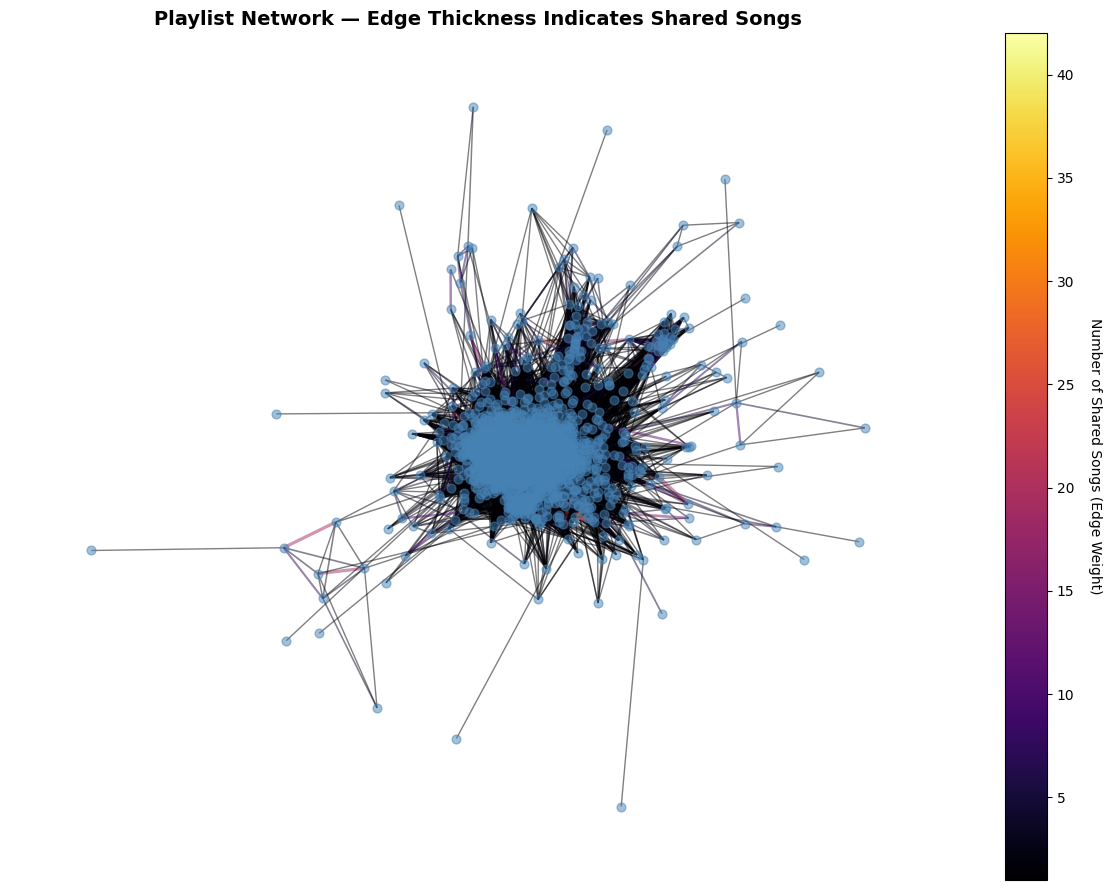

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

# --- 1. LOAD GRAPH ---
with open("playlist_graph_shared_songs_first5.gpickle", "rb") as f:
    G = pickle.load(f)

print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# --- 2. USE LARGEST CONNECTED COMPONENT (optional, for readability) ---
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Using largest connected component ({G.number_of_nodes()} nodes).")

# --- 3. COMPUTE LAYOUT ---
pos = nx.spring_layout(G, k=0.25, iterations=50, seed=42)

# --- 4. EXTRACT EDGE WEIGHTS ---
weights = [d["weight"] for _, _, d in G.edges(data=True)]
max_w = max(weights)
min_w = min(weights)
print(f"Edge weights range from {min_w} to {max_w}")

# Normalize edge widths for plotting
edge_widths = [1 + 3 * (w - min_w) / (max_w - min_w) for w in weights]

# --- 5. PLOT ---
fig, ax = plt.subplots(figsize=(12, 9))

edges = nx.draw_networkx_edges(
    G,
    pos,
    ax=ax,
    width=edge_widths,
    edge_color=weights,
    edge_cmap=plt.cm.inferno,
    alpha=0.5,
)
nx.draw_networkx_nodes(G, pos, node_size=40, node_color="steelblue", alpha=0.5, ax=ax)

ax.set_title("Playlist Network — Edge Thickness Indicates Shared Songs", fontsize=14, fontweight="bold")
ax.axis("off")

# --- 6. COLORBAR ---
sm = plt.cm.ScalarMappable(cmap=plt.cm.inferno)
sm.set_array(weights)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Number of Shared Songs (Edge Weight)", rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


Backbone before filtering: 959 nodes, 4047 edges
After keeping largest connected component: 823 nodes, 3832 edges


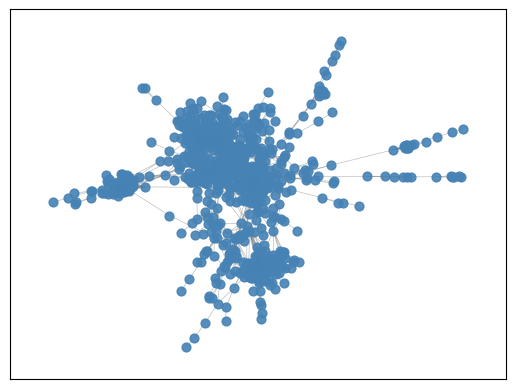

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
# --- 1. THRESHOLD BY WEIGHT ---
threshold = 10
G_backbone = nx.Graph([(u, v, d) for u, v, d in G.edges(data=True) if d["weight"] >= threshold])
print(f"Backbone before filtering: {G_backbone.number_of_nodes()} nodes, {G_backbone.number_of_edges()} edges")

# --- 2. KEEP LARGEST CONNECTED COMPONENT ---
if not nx.is_connected(G_backbone):
    largest_cc = max(nx.connected_components(G_backbone), key=len)
    G_backbone = G_backbone.subgraph(largest_cc).copy()
    print(f"After keeping largest connected component: {G_backbone.number_of_nodes()} nodes, {G_backbone.number_of_edges()} edges")

# --- 3. PLOT ---
pos = nx.spring_layout(G_backbone, k=0.35, iterations=80, seed=42)

nx.draw_networkx_edges(G_backbone, pos, width=0.5, alpha=0.5, edge_color="gray")
nx.draw_networkx_nodes(G_backbone, pos, node_size=40, node_color="steelblue", alpha=0.9)


Edge weights range from 10 to 42


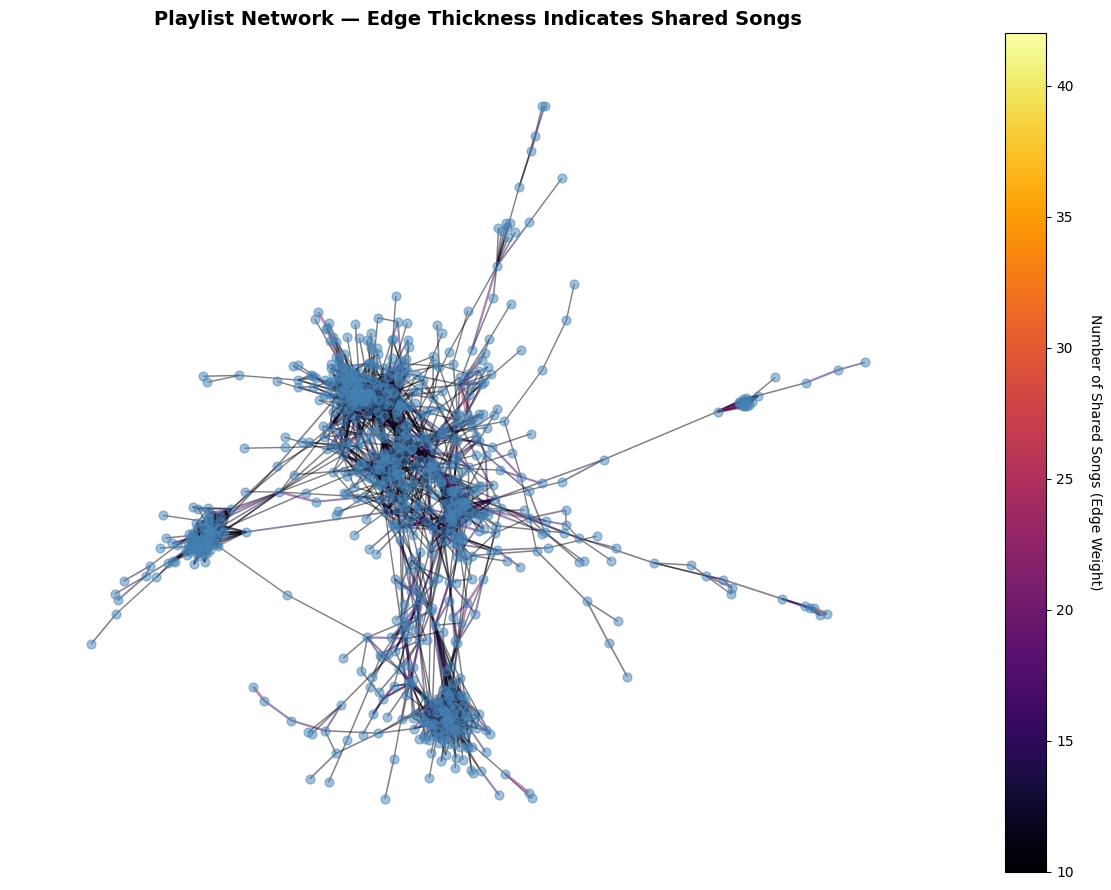

In [9]:
if not nx.is_connected(G_backbone):
    largest_cc = max(nx.connected_components(G_backbone), key=len)
    G = G_backbone.subgraph(largest_cc).copy()
    print(f"Using largest connected component ({G_backbone.number_of_nodes()} nodes).")

# --- 3. COMPUTE LAYOUT ---
pos = nx.spring_layout(G_backbone, k=0.25, iterations=50, seed=42)

# --- 4. EXTRACT EDGE WEIGHTS ---
weights = [d["weight"] for _, _, d in G_backbone.edges(data=True)]
max_w = max(weights)
min_w = min(weights)
print(f"Edge weights range from {min_w} to {max_w}")

# Normalize edge widths for plotting
edge_widths = [1 + 3 * (w - min_w) / (max_w - min_w) for w in weights]

# --- 5. PLOT ---
fig, ax = plt.subplots(figsize=(12, 9))

edges = nx.draw_networkx_edges(
    G_backbone,
    pos,
    ax=ax,
    width=edge_widths,
    edge_color=weights,
    edge_cmap=plt.cm.inferno,
    alpha=0.5,
)
nx.draw_networkx_nodes(G_backbone, pos, node_size=40, node_color="steelblue", alpha=0.5, ax=ax)

ax.set_title("Playlist Network — Edge Thickness Indicates Shared Songs", fontsize=14, fontweight="bold")
ax.axis("off")

# --- 6. COLORBAR ---
sm = plt.cm.ScalarMappable(cmap=plt.cm.inferno)
sm.set_array(weights)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Number of Shared Songs (Edge Weight)", rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


Average degree: 261.08
Max degree: 969


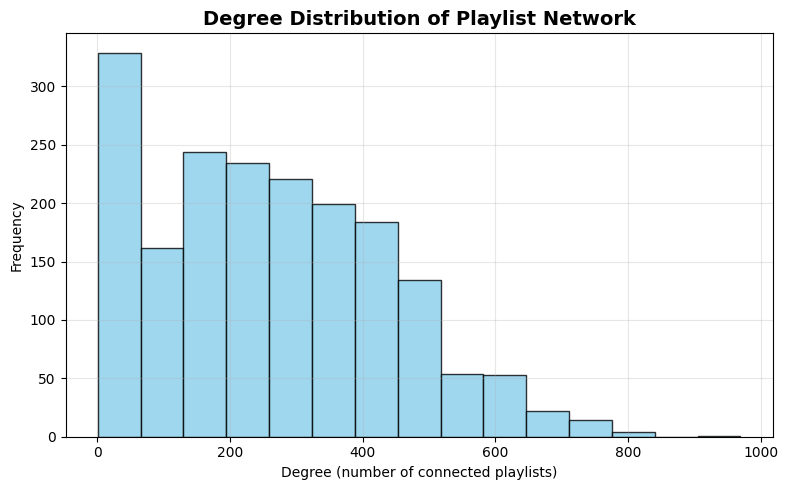

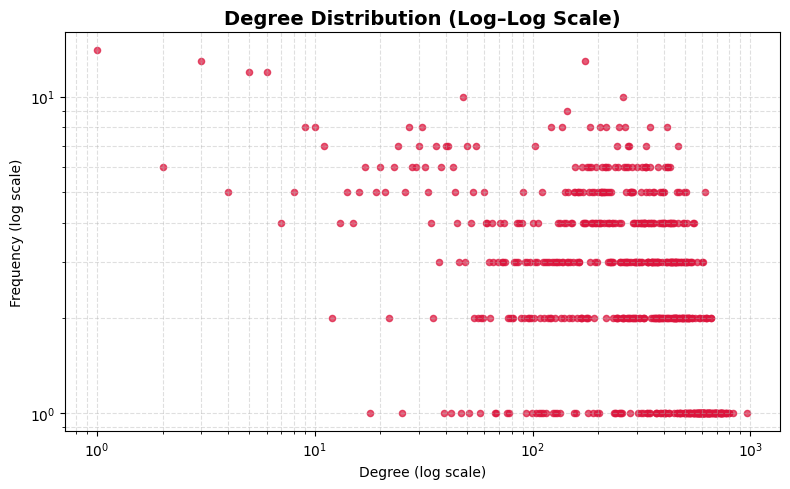

In [58]:
import numpy as np
# --- 2. USE LARGEST CONNECTED COMPONENT ---
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Using largest connected component ({G.number_of_nodes()} nodes).")

# --- 3. GET DEGREE DATA ---
degrees = [d for _, d in G.degree()]
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Max degree: {np.max(degrees)}")

# --- 4. PLOT DEGREE HISTOGRAM (LINEAR SCALE) ---
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=15, color="skyblue", edgecolor="black", alpha=0.8)
plt.title("Degree Distribution of Playlist Network", fontsize=14, fontweight="bold")
plt.xlabel("Degree (number of connected playlists)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 5. PLOT LOG–LOG DEGREE DISTRIBUTION ---
degree_counts = np.bincount(degrees)
degree_values = np.nonzero(degree_counts)[0]
frequencies = degree_counts[degree_values]

plt.figure(figsize=(8, 5))
plt.scatter(degree_values, frequencies, color="crimson", s=20, alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree Distribution (Log–Log Scale)", fontsize=14, fontweight="bold")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Simple network - Artist based


In [59]:
import json
import networkx as nx
from pathlib import Path
from tqdm import tqdm
import pickle

# --- 1. SETUP ---
data_dir = Path(
    r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\final_proj\data"
)

# Define which files to use (first 5 slices)
slice_files = [f"mpd.slice.{i*1000}-{i*1000+999}.json" for i in range(5)]

print(f"Processing {len(slice_files)} files:")
for f in slice_files:
    print("  -", f)

# --- 2. CREATE GRAPH ---
G = nx.Graph()

# --- 3. LOAD AND ADD NODES ---
for filename in slice_files:
    file_path = data_dir / filename
    with open(file_path, "r", encoding="utf-8") as f:
        mpd_slice = json.load(f)

    for pl in mpd_slice["playlists"]:
        pid = pl["pid"]
        track_uris = [t["track_uri"] for t in pl["tracks"]]
        artist_names = [t["artist_name"] for t in pl["tracks"]]

        G.add_node(
            pid,
            num_tracks=len(track_uris),
            track_uris=track_uris,
            artist_names=artist_names,
            name=pl.get("name", ""),
        )

print(f"Total playlists added: {G.number_of_nodes()}")

# --- 4. FILTER PLAYLISTS BASED ON NUMBER OF TRACKS ---
valid_nodes = [n for n, d in G.nodes(data=True) if 40 <= d["num_tracks"] <= 100]
G = G.subgraph(valid_nodes).copy()
print(f"Playlists remaining after filtering (40–100 tracks): {G.number_of_nodes()}")

# --- 5. CREATE EDGES BASED ON SHARED ARTISTS ---
artist_to_playlists = {}
for node, data in tqdm(G.nodes(data=True), desc="Building artist index"):
    for artist in data["artist_names"]:
        artist_to_playlists.setdefault(artist, []).append(node)

edge_count = 0
for artist, plist in tqdm(artist_to_playlists.items(), desc="Creating edges"):
    if len(plist) > 1:
        for i in range(len(plist)):
            for j in range(i + 1, len(plist)):
                p1, p2 = plist[i], plist[j]
                if p1 == p2:
                    continue  # prevent self-loops
                if G.has_edge(p1, p2):
                    G[p1][p2]["weight"] += 1
                else:
                    G.add_edge(p1, p2, weight=1)
                edge_count += 1

# --- 6. CLEANUP ---
G.remove_edges_from(nx.selfloop_edges(G))
print(f"Created {edge_count} edges (shared artists).")
print(f"Final graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")

# --- 7. SAVE GRAPH ---
with open("playlist_graph_shared_artists_first5.gpickle", "wb") as f:
    pickle.dump(G, f)

print("✅ Graph saved as 'playlist_graph_shared_artists_first5.gpickle'")


Processing 5 files:
  - mpd.slice.0-999.json
  - mpd.slice.1000-1999.json
  - mpd.slice.2000-2999.json
  - mpd.slice.3000-3999.json
  - mpd.slice.4000-4999.json
Total playlists added: 5000
Playlists remaining after filtering (40–100 tracks): 1871


Creating edges: 100%|██████████| 14290/14290 [00:09<00:00, 1476.68it/s]


Created 7081261 edges (shared artists).
Final graph: 1871 nodes, 607030 edges.
✅ Graph saved as 'playlist_graph_shared_artists_first5.gpickle'


Using largest connected component (1867 nodes).


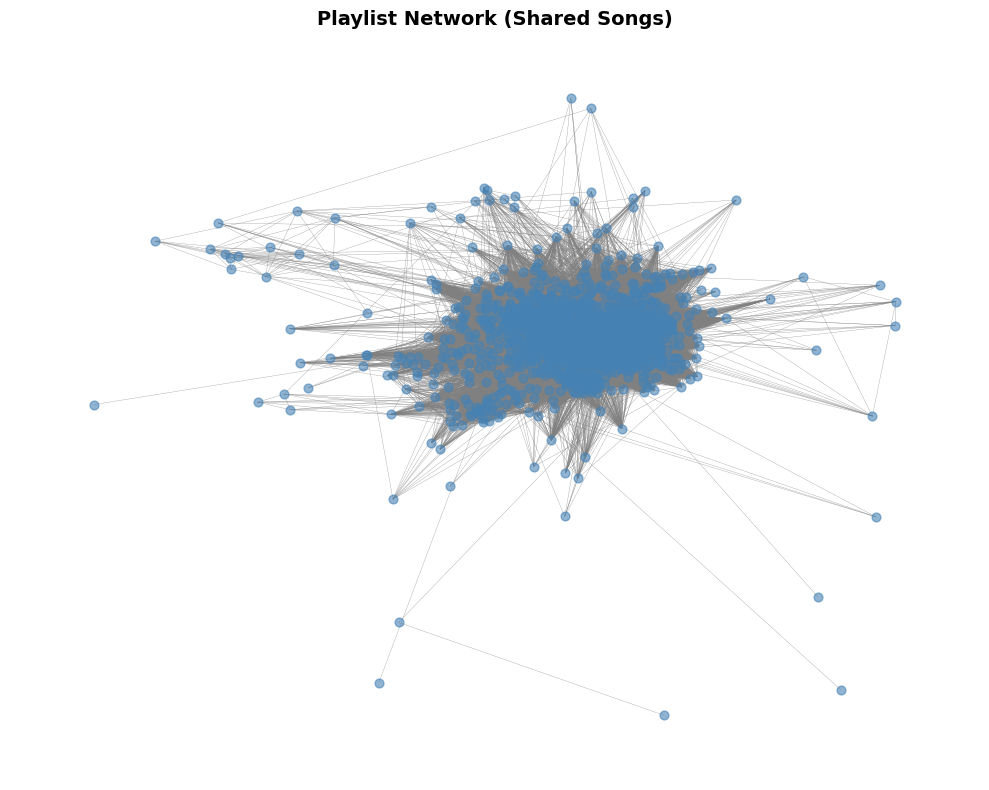

In [60]:
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Using largest connected component ({G.number_of_nodes()} nodes).")

# --- 2. COMPUTE LAYOUT ---
pos = nx.spring_layout(G, k=0.25, iterations=50, seed=42)

# --- 3. PLOT ---
plt.figure(figsize=(10, 8))

nx.draw_networkx_edges(G, pos, width=0.2, alpha=1, edge_color="gray")
nx.draw_networkx_nodes(G, pos, node_size=40, node_color="steelblue", alpha=0.6)

plt.title("Playlist Network (Shared Songs)", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()